# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Integración numérica: Método del Trapecio

### Ejercicio 20.-  Se considera la integral  
### $$  \int_1^{5} f(x) \ dx, \text{ con } f(x)=3\sin(x)\log(x). $$
### (a) Calcula la aproximación de dicha integral mediante el Método del Trapecio con $n=25$ subintervalos.

### (b)  Da una cota superior teórica del error absoluto de la aproximación en el problema. Compara dicha cota con el error obtenido al comparar tu resultado con el de SAGE.

### (c) Sea $l_n(x)$ la función interpoladora lineal a trozos utilizada en el problema. Representa gráficamente $l_n(x)$ y la integral calculada con el método del trapecio.

### (d) Calcula una cota superior teórica del error absoluto $|f(x)-l(x)|$ para cualquier $x\in[1,5]$.

SOLUCIÓN

### (a) Calcula la aproximación de dicha integral mediante el método del trapecio con $n=25$ subintervalos: 

In [1]:
f(x)=3*sin(x)*log(x)
show(f)

x |--> 3*log(x)*sin(x)

En el método del Trapecio subdividimos el intervalo $[a,b]$ con los siguientes nodos: $x_k=a+k\cdot \frac{b-a}{n}$ para $k=0,1,\dots,n$.

La fórmula del Método del Trapecio nos aproxima la integral de la siguiente forma:
<p>$$\displaystyle \int_a^b  {f(x)} \, dx \ \approx {\rm Trapecio}_{n}(f)= \dfrac{b-a}{2n}\Bigl(f(a)+2f(x_1)+\dots+2f(x_{n-1})+f(b)\Bigr)$$</p>

Comenzamos definiendo los nodos para nuestro caso en particular:

In [2]:
a=1;
b=5;
n=25;

In [3]:
X=[a+k*(b-a)/n for k in range(0,n+1)]
show(X)

[1,
 29/25,
 33/25,
 37/25,
 41/25,
 9/5,
 49/25,
 53/25,
 57/25,
 61/25,
 13/5,
 69/25,
 73/25,
 77/25,
 81/25,
 17/5,
 89/25,
 93/25,
 97/25,
 101/25,
 21/5,
 109/25,
 113/25,
 117/25,
 121/25,
 5]

In [4]:
trapecio=(b-a)/(2*n)*(f(a)+2*sum(f(X[k]) for k in range(1,n))+f(b))
trapecio.n()

-2.95560895585530

Veamos el significado de lo que acabamos de calcular: informalmente hablando, se suma el área encima del eje X y se resta la de debajo

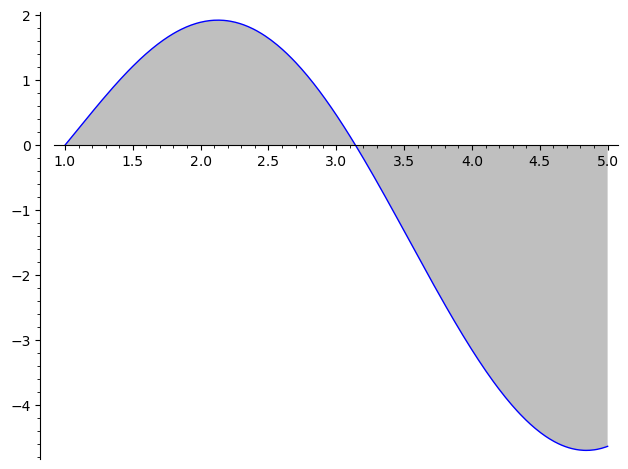

In [5]:
plot(f,x,a,b,fill=true)

### (b) Da una cota superior teórica del error absoluto de la aproximación en el problema. Compara dicha cota con el error obtenido al comparar tu resultado con el de SAGE.

#### Cota del error en el Método del Trapecio 
La cota del error absoluto cometido en el Método del Trapecio la podemos dar de la siguiente forma: 

Dada una constante M de forma que $|f''(x)|\leq M$ para todo $x\in [a,b]$. 
$$\displaystyle \left| {\rm Trapecio}_{n}(f)-\int_a^b f(x) \, dx\right| \leq \dfrac{(b-a)^3}{12\cdot n^2}\cdot M $$

Para determinar $M$ calculamos $f''(x)$ y la representamos gráficamente en $[a,b]$:

In [6]:
show(derivative(f(x),x,2))

-3*log(x)*sin(x) + 6*cos(x)/x - 3*sin(x)/x^2

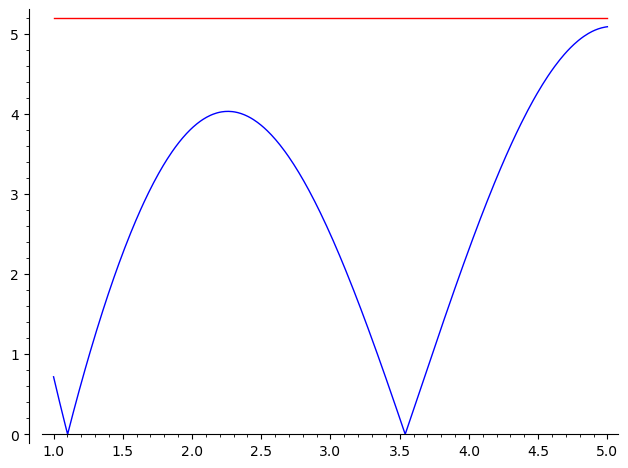

In [7]:
plot(abs(derivative(f(x),x,2)),a,b)+plot(5.2,a,b,color='red')

<p>En esta gráfica se observa que la constante $M=5.2$ cumple $|f''(x)|\leq M$ para todo $x\in [a,b]$.</p>
<p>Por tanto, una cota superior del error absoluto cometido es:</p>

In [8]:
M=5.2;
cota=(b-a)^3/(12*n^2)*M;
cota

0.0443733333333333

Vamos a comprobar que efectivamente el error cometido es menor que la cota encontrada. Para ello comparamos nuestro resultado con el Método del Trapecio con el dado por el propio SAGE,

In [9]:
integral(f(x),x,a,b).n()

-2.95191104449812

In [10]:
trapecio.n()

-2.95560895585530

<p>y la comparamos con el resultado obtenido por el método del trapecio calculando el valor absoluto de la diferencia:</p>

In [11]:
error=abs(trapecio-integral(f(x),x,a,b));
error.n()

0.00369791135717534

que es menor que la cota, lo comprobamos:

In [12]:
error.n()<cota

True

### (c) Sea $l_n(x)$ la función interpoladora lineal a trozos utilizada en el problema. Representa gráficamente $l_n(x)$ y la integral calculada con el método del trapecio.

Para ver gráficamente lo qué hemos calculado con el método del TRAPECIO calculamos la integral definida por la función interpoladora lineal a trozos en los nodos considerados, en rojo. En la siguiente sentencia estamos definiendo a través de $L$ dicha función interpoladora.

In [13]:
show(X) 
XY=[(X[j],f(X[j])) for j in range(0,n+1)]; 
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)
L=piecewise([[(X[j],X[j+1]),r(X[j],X[j+1],x)] for j in range(0,n)],var=x);

[1,
 29/25,
 33/25,
 37/25,
 41/25,
 9/5,
 49/25,
 53/25,
 57/25,
 61/25,
 13/5,
 69/25,
 73/25,
 77/25,
 81/25,
 17/5,
 89/25,
 93/25,
 97/25,
 101/25,
 21/5,
 109/25,
 113/25,
 117/25,
 121/25,
 5]

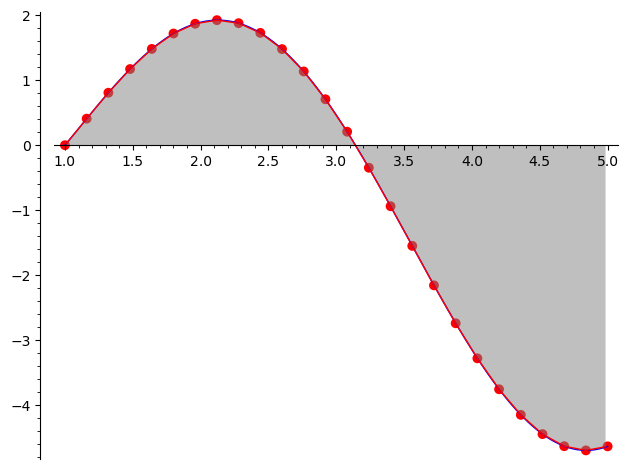

In [14]:
point2d(XY,size=50,color='red')+plot(f,a,b)+plot(L(x),a,b,color='red',fill=true)
#el fill está evidentemente en el plot de L

### (d) Calcula una cota superior teórica del error absoluto $|f(x)-l(x)|$ para cualquier $x\in[1,5]$.

#### Estudio del error cometido en la aproximación: 

En la interpolación lineal a trozos acotamos de la siguiente forma:

Dada una constante $M$ que cumpla $|f''(x)|\leq M$ para todo $x\in [a,b]$. 

La <strong>cota teórica del error absoluto</strong> $|f(x)-l(x)|$ para todo $x\in [a,b]$ es:
     $$\displaystyle \frac{M}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2$$
     
Como ya comprobamos que $M=5.2$ tan solo hay que implementar la cota teórica anterior y calcularla.

In [15]:
cota=M/8*max((X[j+1]-X[j])^2 for j in range(0,n)); 
cota

0.0166400000000000

<p>Podemos comprobar que, efectivamente, el error absoluto es menor que esta cota haciendo la representación gráfica de $|f(x)-l(x)|$:</p>

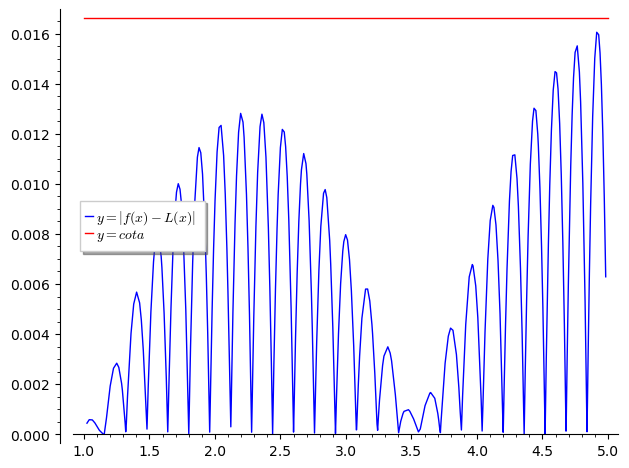

In [16]:
plot(abs(f(x)-L(x)),a,b,legend_label='$y=|f(x)-L(x)|$')+plot(cota,a,b,legend_label='$y=cota$',color='red')